In [4]:
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import numpy as np
from utils import make_data, evaluate_regression_plot

# Gradient descent
In this exercise we will apply it to linear regression problem. We can use the `make_data` function defined in `utils.py` to generate some data. We will use the same function throughout the session.

The generated data (and the regression using the $\theta$ that was employed  to create them) is plotted below.

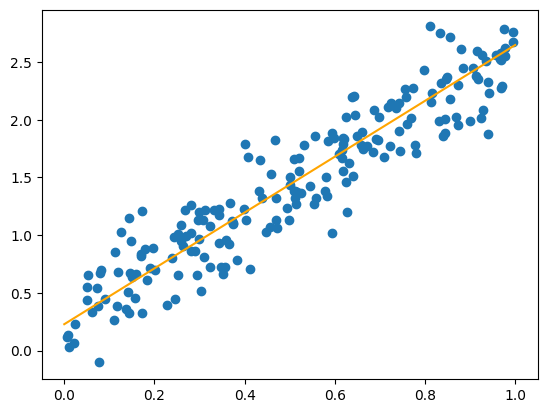

In [5]:
X, y, theta_true = make_data(D=1, T=200)
x_plot, y_plot = evaluate_regression_plot(theta=theta_true)
plt.scatter(X[:, 1], y)
plt.plot(x_plot, y_plot, c='orange')

# Solving the problem with the analytical solution
Recall, we **do not need** to use gradient descent to solve the problem, as it can be solved in closed form

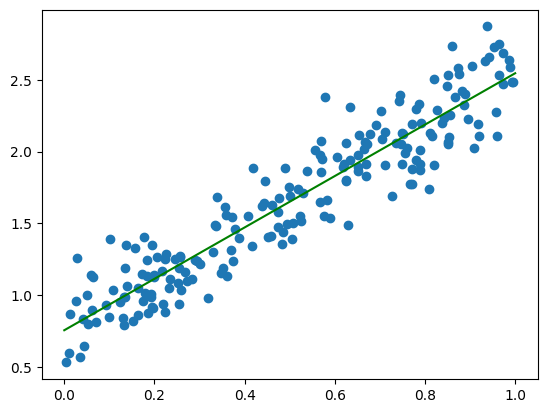

In [30]:
theta_a = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y) 
x_plot, y_plot = evaluate_regression_plot(theta=theta_a)
plt.scatter(X[:, 1], y)
plt.plot(x_plot, y_plot, c='green')

## Solving the problem with gradient descent
However, we will solve the problem with gradient descent. In order to do so, we need to:
- Define a loss function (that we want to minimize)
- Define the gradient of the loss function (that we use to modify the parameters)
- Pick initial point and learning rate

As loss, we can use:
$$\mathcal{L}(\theta) = \frac{1}{T} \Vert X\theta-y\Vert^2_2$$

In [6]:
def obj_val(X, y, theta):
    T = X.shape[0]
    residual = X @ theta - y
    loss = (1 / T) * np.linalg.norm(residual)**2
    return loss

def grad(X, y, theta):
    T = X.shape[0]
    return 1/T * (2*np.matmul(np.matmul(X.T,X), theta) - 2* np.matmul(X.T,y))

We start with a random initialization of $\theta$ and an arbitrary small value of $\alpha$.

In [7]:
theta_init = (np.random.rand(X.shape[1], 1)-0.5)*5
alpha = 0.1

### Step

At this point, it is useful to visualize the space of possible combinations of values for $\theta$. Since the regression is 1 dimensional, we can easily plot it in a 2D plot (one axis for the intercept and one for the coefficient).

We can color the space with the value of the objective function obtained using this specific $\theta$. Let us also indicate the negative gradient at this point.

Text(0, 0.5, '$\\theta_1$')

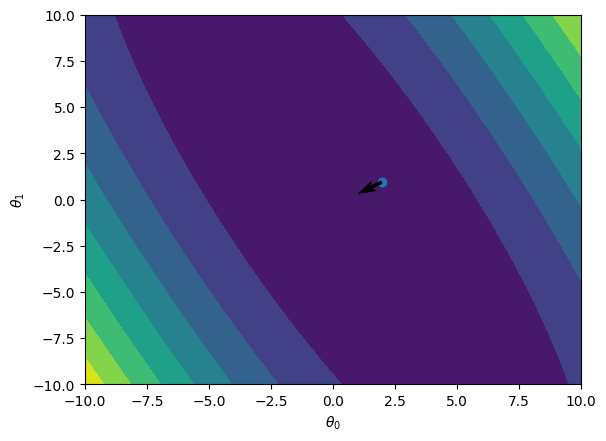

In [8]:
res = 50
xx = np.linspace(-10.0, 10.0, res)

z = np.zeros([res,res])
for i1,x1 in enumerate(xx):
    for i2,x2 in enumerate(xx):
        z[i2,i1] = obj_val(X,y,np.array([[x1],[x2]]))

grad_init = grad(X,y,theta_init)
plt.contourf(xx, xx, z)
plt.scatter(theta_init[0], theta_init[1])
plt.quiver(theta_init[0],theta_init[1],-grad_init[0],-grad_init[1])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")

### Iteration
So, in each iteration, we would like to take a step in the direction of the negative gradient, using $\alpha$ as scaling factor.

Practically speaking, "better" parameters $\theta^{\text{new}}$ can be obtained as:
$$\theta^{\text{new}} = \alpha \cdot-\nabla_\theta \mathcal{L}(\theta)$$

Text(0, 0.5, '$\\theta_1$')

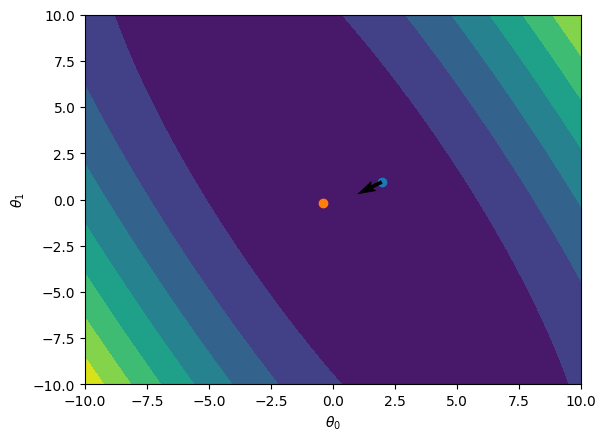

In [10]:
theta_next = alpha * -grad(X, y, theta_init) # TODO: complete here

plt.contourf(xx, xx, z)
plt.scatter(theta_init[0], theta_init[1])
plt.scatter(theta_next[0], theta_next[1])
plt.quiver(theta_init[0],theta_init[1],-grad_init[0],-grad_init[1])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")

### Iterative procedure
We can then repeat the iteration until convergence (i.e., updates lead to sufficiently small decrease in the objective function). Let us start from the beginning and run a full GD.

In [33]:
max_iters = 500
thetas = np.zeros((max_iters,2,1))
thetas[0] = theta_init
thetas[1] = theta_next
theta_old = theta_next

for i in range(1, 500):
    theta_next = thetas[i-1] - alpha * grad(X, y, thetas[i-1])
    thetas[i] = theta_next



Plot the trajectory

Text(0, 0.5, '$\\theta_1$')

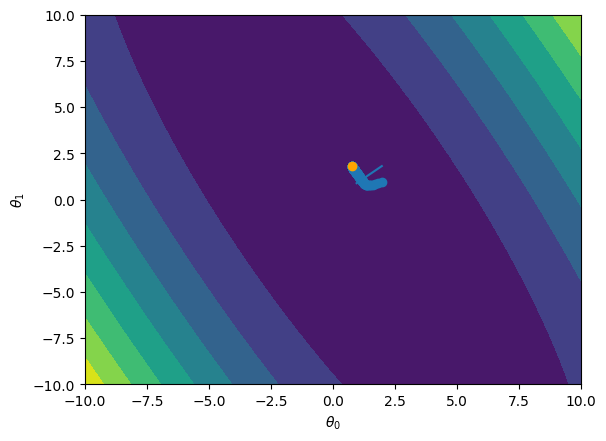

In [34]:
plt.contourf(xx, xx, z)
plt.scatter(thetas[:, 0], thetas[:, 1])
plt.plot(thetas[0, :], thetas[1, :])
plt.scatter(theta_true[0], theta_true[1], c='orange')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")

Plot the distance to the optimal value per iteration

Text(0.5, 1.0, 'Eiklidische Abstände der Thetas')

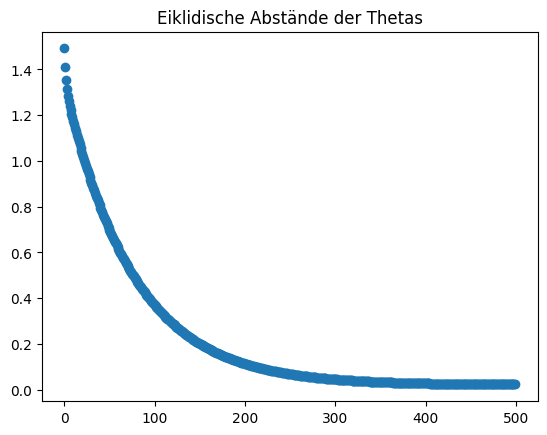

In [35]:
distance = np.linalg.norm(thetas - theta_true, axis=1)
plt.scatter(range(0,max_iters), distance)
plt.title("Eiklidische Abstände der Thetas")


In [ ]:
# TODO: complete here

[optional] Plot an animation of the process

In [ ]:
from matplotlib.animation import FuncAnimation
frames = np.linspace(1, len(obj_vals), dtype=np.int64)
# frames = np.arange(1, len(obj_vals), dtype=np.int64)

mosaic = """
AACC
BBCC
"""
fig, ax = plt.subplot_mosaic(mosaic, figsize=(12,8))

line_objs, = ax["A"].plot(0, obj_vals[0])
line_dist, = ax["A"].plot(0, dists[0])

ax["B"].scatter(X[:,1], y)
line_regr, = ax["B"].plot([],[])

ax["B"].set_xlabel(r"$x$")
ax["B"].set_ylabel(r"$y$")



ax["C"].contourf(xx, xx, z)
ax["C"].scatter(theta_true[0], theta_true[1], c='r')
ax["C"].set_xlabel(r"$\theta_0$")
ax["C"].set_ylabel(r"$\theta_1$")
scatter_theta, = ax["C"].plot([],[], 'ro')
line_theta, = ax["C"].plot([],[])

fig.tight_layout()

def update(i):
    line_objs.set_data(frames[:i].flatten(), obj_vals[:i].flatten())
    ax["A"].set_xlim(0, i+1)
    ax["A"].set_ylim(0, 27)
    ax["A"].set_xticks(frames[:i].flatten(), frames[:i].flatten())
    line_dist.set_data(frames[:i].flatten(), dists[:i].flatten())

    x_plot_curr, y_plot_curr = evaluate_regression_plot(theta=thetas[:,[i-1]])

    line_regr.set_data(x_plot_curr, y_plot_curr)

    scatter_theta.set_data(thetas[0,i-1].flatten(), thetas[1,i-1].flatten())
    line_theta.set_data(thetas[0,:i].flatten(), thetas[1,:i].flatten())
    return line_objs,line_dist, scatter_theta, line_theta, line_regr

ani = FuncAnimation(
    fig, update, frames=len(frames)
)
plt.close()
ani

NameError: name 'obj_vals' is not defined

The animation can be saved as a video if desired.

In [ ]:
ani.save('GD_linear_regression.mp4')